<a href="https://colab.research.google.com/github/Jeevesh8/loss-surface-simplexes/blob/main/experiments/star_bert/misc/clustering_NA_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download Repo

In [1]:
!git clone https://github.com/RachitBansal/loss-surface-simplexes

Cloning into 'loss-surface-simplexes'...
remote: Enumerating objects: 3205, done.
remote: Counting objects: 100% (2012/2012), done.
remote: Compressing objects: 100% (1726/1726), done.
remote: Total 3205 (delta 651), reused 1586 (delta 285), pack-reused 1193
Receiving objects: 100% (3205/3205), 78.47 MiB | 32.17 MiB/s, done.
Resolving deltas: 100% (1273/1273), done.


In [2]:
%cd loss-surface-simplexes/experiments/star_bert/

/content/loss-surface-simplexes/experiments/star_bert


## Loading Log 

### From Log File

In [121]:
import re

In [122]:
def get_interpolation_wise_data(lines):    
    interpol_wise = []
    for line in lines:
        match_obj = re.match(r"Euclidean distance between (\d+) and (\d+): (\d+\.\d+).", line)
        if match_obj is not None:
            if len(interpol_wise)>0 and len(interpol_wise[-1])<40:
                print("Removing incomplete iteration stored in:", 
                      interpol_wise[-1], "\n\n")
                interpol_wise = interpol_wise[:-1]
            interpol_wise.append([])
        if len(interpol_wise)!=0:
            interpol_wise[-1].append(line)
    return interpol_wise

In [123]:
def get_data_from_strs(interpol_strs, idx=3):
    """idx: 3 for accuracy, 4 for loss"""
    match_obj = re.match(r"Euclidean distance between (\d+) and (\d+): (\d+\.\d+).", interpol_strs[0])
    interpol_from = int(match_obj[2])
    interpol_to = int(match_obj[1])
    euc_dist = float(match_obj[3])
    loss_vals = []
    #print(interpol_strs)
    for i, st in enumerate(interpol_strs):
        if st.startswith("-----------  ---------------  ------------- "):
            #print("appending:", float(interpol_strs[i+1].split()[idx]))
            loss_vals.append(float(interpol_strs[i+1].split()[idx]))
        elif st.startswith("--"):
            print("skipping", st)
    if len(loss_vals)!=10:
        raise ValueError(f"Number of loss values read, must be 10! Instead read: {loss_vals}")
    return interpol_from, interpol_to, euc_dist, loss_vals[::-1]

In [124]:
def load_file(filename, correct_order: bool=False, idx: int=3):
    vals = dict()
    with open(filename) as f:
        lines = [elem.strip() for elem in f.readlines()]
    interpol_wise = get_interpolation_wise_data(lines)
    for interpolation_data in interpol_wise:
        i, j, dist, losses = get_data_from_strs(interpolation_data, idx)
        vals[(i,j)] = (dist, losses[::-1])
        vals[(j,i)] = (dist, losses)
    return vals

In [244]:
metric = "loss"                                                                  #or "loss" for loss or "acc" for accuracy
vals = load_file("/content/loss-surface-simplexes/experiments/star_bert/saved-logs/25by25_interpol_mlm.log",
                 idx=3 if metric=="acc" else 4,
                 correct_order=False)                                           #Always False here.
#vals.update(load_file("saved-logs/100by100_interpol1.log"))

Removing incomplete iteration stored in: ['Euclidean distance between 1 and 8: 701.253662109375.', 'Interpolating between 1 and 8 on bookcorpus dataset(None cases)', '[0.0, 1.0]', 'point_num    correct preds    total preds    accuracy         loss', '-----------  ---------------  -------------  ----------  -----------', '0              131           7314  1.79108559  34.58418285', '[0.1111111111111111, 0.8888888888888888]', 'point_num    correct preds    total preds    accuracy         loss', '-----------  ---------------  -------------  ----------  -----------', '1               92           7267  1.26599697  42.70331588', '[0.2222222222222222, 0.7777777777777778]', 'point_num    correct preds    total preds    accuracy          loss', '-----------  ---------------  -------------  ----------  ------------', '2               17           7312  0.23249453  102.81798797', '[0.3333333333333333, 0.6666666666666667]', 'point_num    correct preds    total preds    accuracy          loss', '-

### From pkl file

In [245]:
filename = "/content/loss-surface-simplexes/experiments/star_bert/saved-logs/25by25_mlm.pkl"
correct_order = True                                                            #Whether loss elements are in correct order. Correct order in 25by_25_mlm.pkl, 25by25_obj_rel_no_comp_across_anim.pkl.

In [246]:
import pickle

with open(filename, "rb") as f:
    pkl_vals = pickle.load(f)
print(pkl_vals)
idx = 4 if metric=="loss" else 3

new_vals = {}
for k,v in pkl_vals.items():
    losses, dist = v
    #print(k, losses)
    new_vals[k] = (dist, [elem[idx] for elem in losses])
    i,j = k
    new_vals[(j,i)] =(new_vals[k][0], new_vals[k][1][::-1])
    if not correct_order:
        new_vals[(i,j)] = (new_vals[(i,j)][0], new_vals[(i,j)][1][::-1])
        new_vals[(j,i)] = (new_vals[(i,j)][0], new_vals[(i,j)][1][::-1])

{(0, 1): ([[9, 125, 7242, 1.7260425296879316, 36.081739263948045], [8, 79, 7203, 1.0967652367069278, 43.20469317898955], [7, 6, 7241, 0.08286148322054965, 121.99493488279631], [6, 4, 7087, 0.05644137152532807, 141.2287188401188], [5, 0, 7167, 0.0, 139.64329007408085], [4, 11, 7165, 0.15352407536636428, 131.3449622868327], [3, 2, 7173, 0.027882336539802037, 125.46168450632472], [2, 16, 7259, 0.22041603526656564, 100.36596711638677], [1, 101, 7419, 1.3613694568001078, 42.409108566199855], [0, 123, 7176, 1.7140468227424748, 34.65884936958917]], 702.0604858398438), (1, 0): ([[0, 123, 7176, 1.7140468227424748, 34.65884936958917], [1, 101, 7419, 1.3613694568001078, 42.409108566199855], [2, 16, 7259, 0.22041603526656564, 100.36596711638677], [3, 2, 7173, 0.027882336539802037, 125.46168450632472], [4, 11, 7165, 0.15352407536636428, 131.3449622868327], [5, 0, 7167, 0.0, 139.64329007408085], [6, 4, 7087, 0.05644137152532807, 141.2287188401188], [7, 6, 7241, 0.08286148322054965, 121.9949348827963

### Check same values

In [247]:
for i in range(25):
    for j in range(25):
        if i!=j:
            dist1, losses1 = new_vals[(i,j)]
            dist2, losses2 = new_vals[(i,j)]
            
            if abs(dist1-dist2)>1e-6:
                raise ValueError(f"Distance values at ({i}, {j}): {dist1}, \
                {dist2} do not match.")
            
            if len(losses1)!=len(losses2):
                raise ValueError(f"Length of losses at ({i}, {j}): {len(losses1)}\
                , {len(losses2)} do not match.")
            
            for k, (loss1, loss2) in enumerate(zip(losses1, losses2)):
                if abs(loss1-loss2)>1e-6:
                    raise ValueError(f"Loss values at index {k} for losses with key\
                    ({i}, {j}): {loss1}, {loss2} do not match.")

In [248]:
vals = new_vals

### Flip Curves for accuracies
* Necessary as bumps in loss space are valleys in accuracy space

In [249]:
if metric=="acc":
    new_vals = {}
    for k, v in vals.items():
        dist, losses = v
        min_loss = -max(losses)
        new_vals[k] = (dist, [-min_loss-acc for acc in losses])
    vals = new_vals

## Metrics

In [250]:
def BH_metric(losses):
    """Computes Bump Height Metric"""
    max_height = 0
    left = right = mid = -len(losses)-1
    for i in range(1, 9):
        bump_center = i
        if (losses[bump_center-1]<losses[bump_center] and 
            losses[bump_center+1]<losses[bump_center]):
            left_min = bump_center-1
            right_min = bump_center+1
        else:
            continue
        while left_min>0 and losses[left_min-1]<=losses[left_min]:
            left_min -= 1
        while right_min<9 and losses[right_min+1]<=losses[right_min]:
            right_min += 1
        left_height = losses[bump_center]-losses[left_min]
        right_height = losses[bump_center]-losses[right_min]
        bump_height = (left_height+right_height)/2
        if bump_height>=max_height:
            left, right, mid = left_min, right_min, bump_center
            max_height = bump_height
    return max_height, (left, mid, right)

In [251]:
def BA_metric(euc_dist, losses):
    """Computes Bump Area Metric"""
    max_height, (left, mid, right) = BH_metric(losses)
    if max_height==0:
        return 0
    area = 0.
    step_size = euc_dist/(len(losses)-1)
    #print(("left", left))
    #print(("mid", mid))
    #print(("right", right))
    for j in range(left, right):
        area += step_size*(losses[j]+losses[j+1])/2
        #print((j, losses[j]))
    return abs(area)

In [252]:
def AreaUnderCurve(euc_dist, losses):
    """Computes the are under the losses curve after subtracting minimum loss
    from each loss."""
    area = 0.
    min_loss = min(losses)
    losses = [loss-min_loss for loss in losses]
    step_size = euc_dist/(len(losses)-1)
    for j in range(0, len(losses)-1):
        area += step_size*(losses[j]+losses[j+1])/2
    return abs(area)

In [253]:
def BH_distance_fn(i, j):
    if int(i)!=i:
        print("check i:", i,j)
    i = int(i)
    j = int(j)
    if i==j:
        return 0
    euc_dist, losses = vals[(i,j)]
    height, _ = BH_metric(losses)
    #print(f"height between {i} and {j}: {height}")
    return height

def BA_distance_fn(i,j):
    i = int(i)
    j = int(j)
    if i==j:
        return 0
    euc_dist, losses = vals[(i,j)]
    return BA_metric(euc_dist, losses)

def AreaUnderCurve_distance_fn(i,j):
    i = int(i)
    j = int(j)
    if i==j:
        return 0
    euc_dist, losses = vals[(i,j)]
    return AreaUnderCurve(euc_dist, losses)

## Loading Performances on NA-task on 10,000 samples

In [162]:
%cd /content
!git clone https://github.com/Jeevesh8/bert-syntax/
%cd bert-syntax/
!git checkout patch-1

/content
fatal: destination path 'bert-syntax' already exists and is not an empty directory.
/content/bert-syntax
Already on 'patch-1'
Your branch is up to date with 'origin/patch-1'.


In [163]:
%%bash
mkdir intermediate/
for cond in reflexive_sent_comp reflexives_across obj_rel_no_comp_across_anim obj_rel_within_anim prep_anim sent_comp subj_rel vp_coord long_vp_coord simple_reflexives simple_agrmt simple_npi_anim
do
    python3 gen_marvin_tbl.py ${cond} > intermediate/out_file_${cond};
done

mkdir: cannot create directory ‘intermediate/’: File exists


In [164]:
import re

In [165]:
def get_data(tbl, cond):
    tbl = str(tbl)
    out_lis = []
    for line in tbl.split("\n"):
        if line.startswith("Found"):
            tot_samples = int(re.match(r"Found (\d+)", line).group(1))
        try:
            score = float(line.split("&")[2])
        except:
            print("Skipping:", line)
            continue
        if line.startswith(cond):
            out_lis.append(score)
    return tot_samples, out_lis

In [166]:
conds_lis = ["reflexive_sent_comp", "reflexives_across", "obj_rel_no_comp_across_anim", "obj_rel_within_anim", "prep_anim", "sent_comp", "subj_rel", "vp_coord", "long_vp_coord", "simple_reflexives", "simple_agrmt", "simple_npi_anim"]
cond_wise_scores = {}
cond_wise_samples = {}
for cond in conds_lis:
    with open("intermediate/out_file_"+cond, "r") as f:
        tbl = f.read()
    tot_samples, out_lis = get_data(tbl, cond)
    cond_wise_scores[cond] = out_lis
    cond_wise_samples[cond] = tot_samples

Skipping: Found 3360 samples for reflexive_sent_comp
Skipping: 
Skipping: Found 3360 samples for reflexive_sent_comp
Skipping: 
Skipping: Found 3360 samples for reflexive_sent_comp
Skipping: 
Skipping: Found 3360 samples for reflexive_sent_comp
Skipping: 
Skipping: Found 3360 samples for reflexive_sent_comp
Skipping: 
Skipping: Found 3360 samples for reflexive_sent_comp
Skipping: 
Skipping: Found 3360 samples for reflexive_sent_comp
Skipping: 
Skipping: Found 3360 samples for reflexive_sent_comp
Skipping: 
Skipping: Found 3360 samples for reflexive_sent_comp
Skipping: 
Skipping: Found 3360 samples for reflexive_sent_comp
Skipping: 
Skipping: Found 3360 samples for reflexive_sent_comp
Skipping: 
Skipping: Found 3360 samples for reflexive_sent_comp
Skipping: 
Skipping: Found 3360 samples for reflexive_sent_comp
Skipping: 
Skipping: Found 3360 samples for reflexive_sent_comp
Skipping: 
Skipping: Found 3360 samples for reflexive_sent_comp
Skipping: 
Skipping: Found 3360 samples for reflexi

In [167]:
#cond_wise_samples["obj_rel_no_comp_across_anim"], 
scores = cond_wise_scores["obj_rel_no_comp_across_anim"]

In [168]:
scores = {i: score for i, score in enumerate(scores)}

In [169]:
models_sorted_by_acc = [k for k,v in sorted(scores.items(), key=lambda elem: elem[1])]
models_accs_sorted_by_acc = [v for k,v in sorted(scores.items(), key=lambda elem: elem[1])]
print(models_sorted_by_acc)
print(models_accs_sorted_by_acc)

[6, 10, 18, 19, 1, 13, 17, 3, 11, 14, 22, 12, 15, 16, 4, 9, 2, 21, 24, 0, 20, 7, 8, 5, 23]
[0.55, 0.56, 0.56, 0.57, 0.61, 0.61, 0.61, 0.62, 0.62, 0.62, 0.62, 0.64, 0.64, 0.64, 0.65, 0.65, 0.66, 0.66, 0.67, 0.68, 0.68, 0.7, 0.7, 0.72, 0.72]


## Performance Wise Heat maps

### Getting Distances

In [255]:
bh_dists = [[BH_distance_fn(i,j) for j in models_sorted_by_acc] for i in models_sorted_by_acc]
ba_dists = [[BA_distance_fn(i,j) for j in models_sorted_by_acc] for i in models_sorted_by_acc]
auc_dists = [[AreaUnderCurve_distance_fn(i,j) for j in models_sorted_by_acc] for i in models_sorted_by_acc]

In [254]:
bh_dists[0][15]

0

### Plotting Performance-Wise Heat Map

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [185]:
#Run only to change minimum values
#auc_dists = np.array(auc_dists)
#idx = auc_dists==0
#auc_dists[idx] = np.inf
#auc_dists[idx] = np.min(auc_dists)

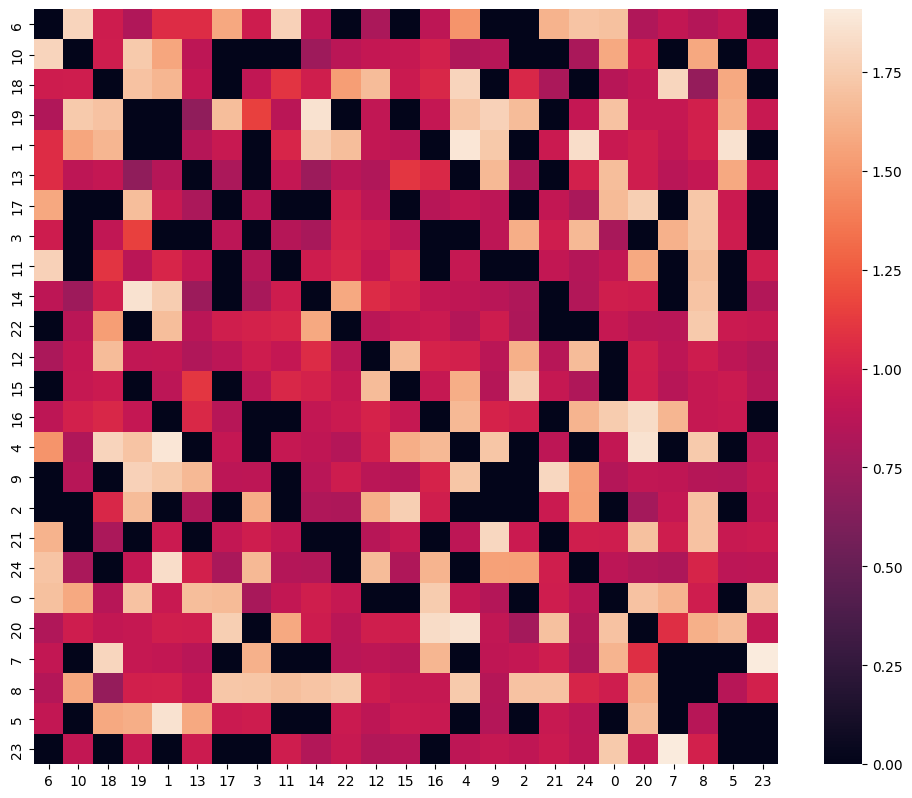

In [189]:
plt.figure(figsize=(12,10), dpi=100)
ax = sns.heatmap(bh_dists,                                                     #Try changing to ba_dists or bh_dists or auc_dists here.
                 xticklabels=models_sorted_by_acc,
                 yticklabels=models_sorted_by_acc,)
plt.show()

## Spectral Clustering

In [375]:
import numpy as np
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=12, affinity="precomputed")

* Choose metric function as ``BH_distance_fn()``, ``BA_distance_fn()`` or 
``AreaUnderCurve_distance_fn()``

In [376]:
distance_fn = BH_distance_fn
dist_matrix = np.array([[distance_fn(i,j) for j in range(25)] for i in range(25)])
delta = 100.0
sim_matrix = np.exp(-dist_matrix**2 / (2. * delta ** 2))

In [377]:
sc_out = sc.fit(sim_matrix)

In [378]:
clusters = {}
for model_no, cluster in enumerate(sc_out.labels_):
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(model_no)

In [379]:
clusters = list(clusters.values())
print(clusters)

[[0, 19], [1, 22], [2], [3, 7], [4, 6, 16, 21], [5, 18], [8, 10, 15], [9, 24], [11, 23], [12, 13], [14, 20], [17]]


In [380]:
cluster_ordered_models = [item for elem in clusters for item in elem]
dists = [[distance_fn(i,j) for j in cluster_ordered_models] for i in cluster_ordered_models]

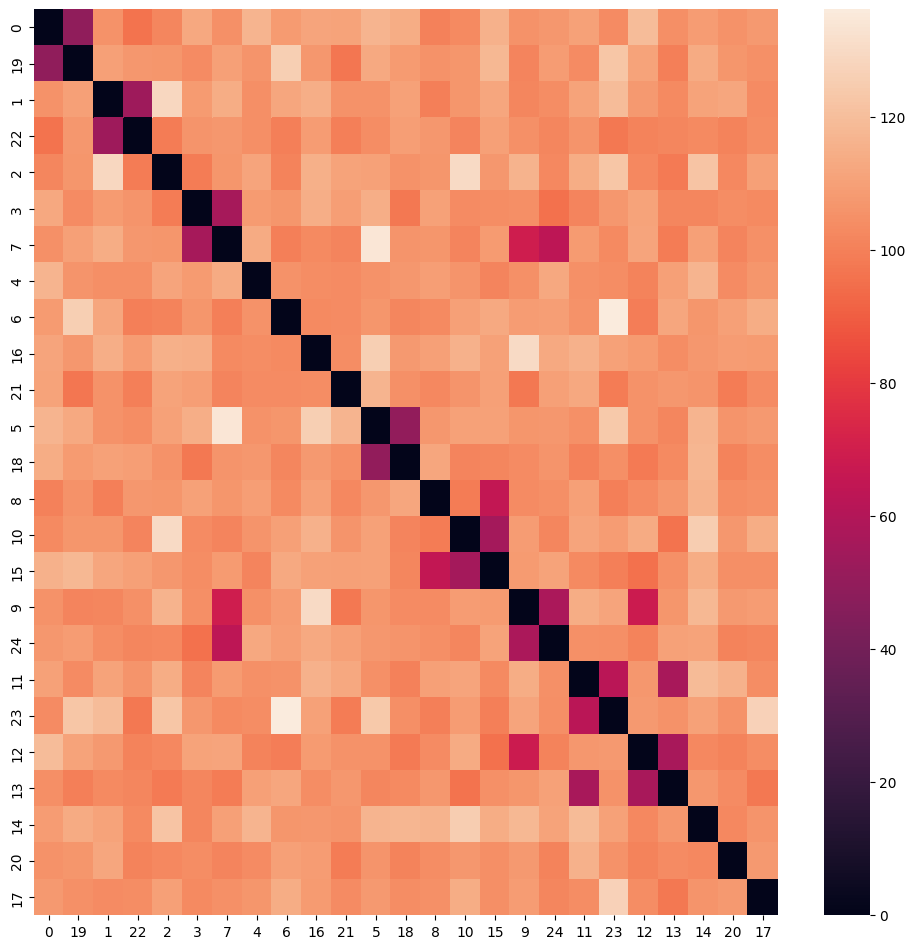

In [381]:
plt.figure(figsize=(12,12), dpi=100)
ax = sns.heatmap(dists, 
                 yticklabels=cluster_ordered_models, 
                 xticklabels=cluster_ordered_models)
plt.show()